<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_3_6)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,86.492684,45.547827,0.000507,142.041017,142.041040,-0.000023
1,0.0,1.0,95.097973,99.916781,0.000201,205.014955,205.015364,-0.000409
2,0.0,2.0,70.589351,98.701984,0.000061,179.291396,179.291449,-0.000053
3,0.0,3.0,83.492753,96.460963,-0.000123,189.953593,189.954096,-0.000503
4,0.0,4.0,28.942313,99.626497,-0.000074,138.568736,138.568077,0.000659
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.048867,67.037565,0.000401,108.086833,108.086215,0.000617
59996,999.0,56.0,51.153085,70.245812,0.000219,131.399115,131.398828,0.000287
59997,999.0,57.0,30.932951,56.749978,0.000613,97.683542,97.682688,0.000854
59998,999.0,58.0,66.114259,94.143177,-0.000273,170.257162,170.257528,-0.000366


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,86.492684,45.547827,0.000507,142.041017,142.041040,-0.000023
1,0.0,1.0,95.097973,99.916781,0.000201,205.014955,205.015364,-0.000409
2,0.0,2.0,70.589351,98.701984,0.000061,179.291396,179.291449,-0.000053
3,0.0,3.0,83.492753,96.460963,-0.000123,189.953593,189.954096,-0.000503
4,0.0,4.0,28.942313,99.626497,-0.000074,138.568736,138.568077,0.000659
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.048867,67.037565,0.000401,108.086833,108.086215,0.000617
59996,999.0,56.0,51.153085,70.245812,0.000219,131.399115,131.398828,0.000287
59997,999.0,57.0,30.932951,56.749978,0.000613,97.683542,97.682688,0.000854
59998,999.0,58.0,66.114259,94.143177,-0.000273,170.257162,170.257528,-0.000366


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    86.492684  45.547827  0.000507  142.041017  142.041040 -0.000023
      1.0    95.097973  99.916781  0.000201  205.014955  205.015364 -0.000409
      2.0    70.589351  98.701984  0.000061  179.291396  179.291449 -0.000053
      3.0    83.492753  96.460963 -0.000123  189.953593  189.954096 -0.000503
      4.0    28.942313  99.626497 -0.000074  138.568736  138.568077  0.000659
...                ...        ...       ...         ...         ...       ...
999.0 55.0   31.048867  67.037565  0.000401  108.086833  108.086215  0.000617
      56.0   51.153085  70.245812  0.000219  131.399115  131.398828  0.000287
      57.0   30.932951  56.749978  0.000613   97.683542   97.682688  0.000854
      58.0   66.114259  94.143177 -0.000273  170.257162  170.257528 -0.000366
      59.0   38.773923  51.291337 -0.000748  100.064512  100.065060 -0.000549

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    86.492684  45.547827  0.000507  142.041017  142.041040 -0.000023
      1.0    95.097973  99.916781  0.000201  205.014955  205.015364 -0.000409
      2.0    70.589351  98.701984  0.000061  179.291396  179.291449 -0.000053
      3.0    83.492753  96.460963 -0.000123  189.953593  189.954096 -0.000503
      4.0    28.942313  99.626497 -0.000074  138.568736  138.568077  0.000659
...                ...        ...       ...         ...         ...       ...
999.0 55.0   31.048867  67.037565  0.000401  108.086833  108.086215  0.000617
      56.0   51.153085  70.245812  0.000219  131.399115  131.398828  0.000287
      57.0   30.932951  56.749978  0.000613   97.683542   97.682688  0.000854
      58.0   66.114259  94.143177 -0.000273  170.257162  170.257528 -0.000366
      59.0   38.773923  51.291337 -0.000748  100.064512  100.065060 -0.000549

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,86.492684,45.547827,0.000507,142.041017,142.041040,-0.000023
1,0.0,1.0,95.097973,99.916781,0.000201,205.014955,205.015364,-0.000409
2,0.0,2.0,70.589351,98.701984,0.000061,179.291396,179.291449,-0.000053
3,0.0,3.0,83.492753,96.460963,-0.000123,189.953593,189.954096,-0.000503
4,0.0,4.0,28.942313,99.626497,-0.000074,138.568736,138.568077,0.000659
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,31.048867,67.037565,0.000401,108.086833,108.086215,0.000617
59996,999.0,56.0,51.153085,70.245812,0.000219,131.399115,131.398828,0.000287
59997,999.0,57.0,30.932951,56.749978,0.000613,97.683542,97.682688,0.000854
59998,999.0,58.0,66.114259,94.143177,-0.000273,170.257162,170.257528,-0.000366


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    86.492684  45.547827  0.000507  142.041017  142.041040 -0.000023
      1.0    95.097973  99.916781  0.000201  205.014955  205.015364 -0.000409
      2.0    70.589351  98.701984  0.000061  179.291396  179.291449 -0.000053
      3.0    83.492753  96.460963 -0.000123  189.953593  189.954096 -0.000503
      4.0    28.942313  99.626497 -0.000074  138.568736  138.568077  0.000659
...                ...        ...       ...         ...         ...       ...
999.0 55.0   31.048867  67.037565  0.000401  108.086833  108.086215  0.000617
      56.0   51.153085  70.245812  0.000219  131.399115  131.398828  0.000287
      57.0   30.932951  56.749978  0.000613   97.683542   97.682688  0.000854
      58.0   66.114259  94.143177 -0.000273  170.257162  170.257528 -0.000366
      59.0   38.773923  51.291337 -0.000748  100.064512  100.065060 -0.000549

[60000 rows x 6 columns]

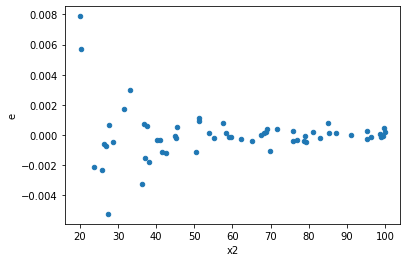

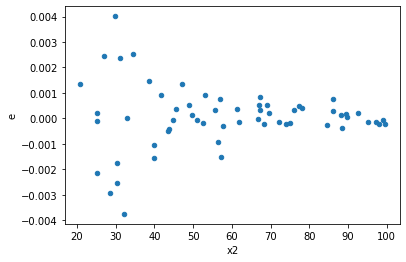

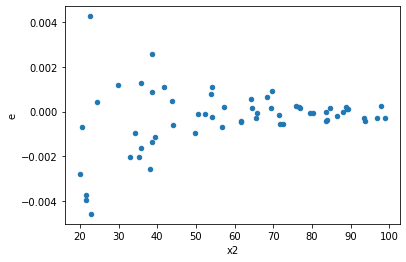

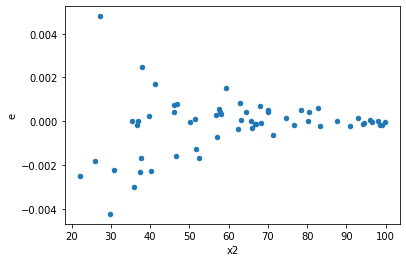

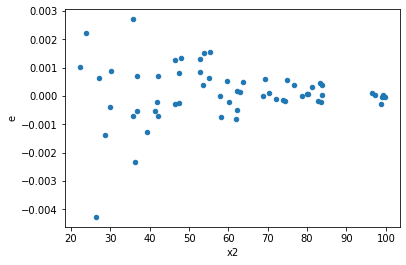

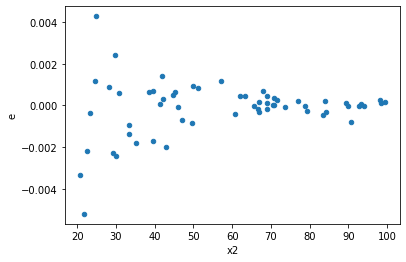

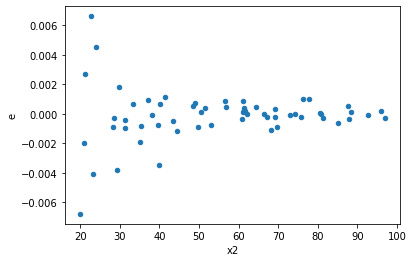

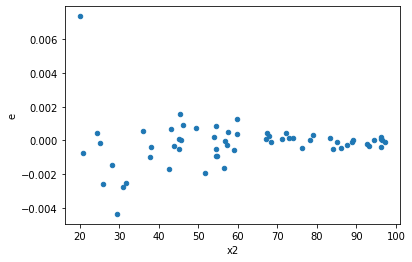

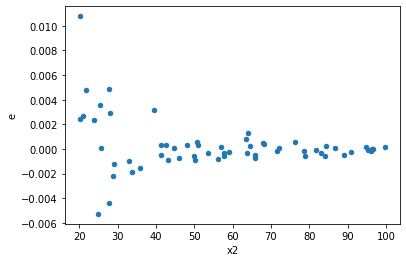

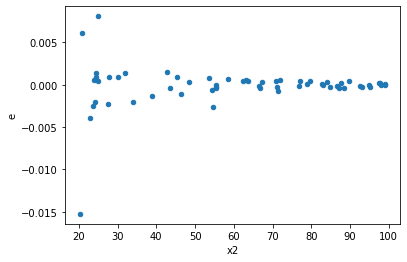

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,0.00011362964220301144,3.2869044018644213e-06,5.16498373650052e-06,1.4940474553929188e-07,0.028926469696982916,4.71179665078759e-12,Reject001=0 : Heteroscedasticity
1.0,22.0,22.0,8.134114568773962e-05,2.265938901803738e-06,3.6973248039881643e-06,1.0299722280926081e-07,0.027857228745000063,3.17938526386127e-12,Reject001=0 : Heteroscedasticity
2.0,22.0,22.0,9.246067100057873e-05,2.424957017378686e-06,4.2027577727535785e-06,1.1022531897175845e-07,0.02622690265100399,1.690914598146137e-12,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,8.551845819046585e-05,1.9818574225114317e-06,3.887202645021175e-06,9.008442829597416e-08,0.02317461591855946,4.603511450243551e-13,Reject001=0 : Heteroscedasticity
4.0,22.0,22.0,4.885885255152078e-05,1.3408247439979086e-06,2.2208569341600355e-06,6.094657927263221e-08,0.027442820982830757,2.7181156037032618e-12,Reject001=0 : Heteroscedasticity
5.0,22.0,22.0,6.895545496217199e-05,2.0226945205733114e-06,3.1343388619169086e-06,9.194066002605962e-08,0.02933335037355542,5.450784119344263e-12,Reject001=0 : Heteroscedasticity
6.0,22.0,22.0,0.0001762053867424831,5.266496803899971e-06,8.009335761021958e-06,2.393862183590896e-07,0.02988839842675604,6.6267002368588076e-12,Reject001=0 : Heteroscedasticity
7.0,22.0,22.0,9.853003656162362e-05,1.371215899506175e-06,4.478638025528346e-06,6.232799543209887e-08,0.01391672983546064,2.024753919174832e-15,Reject001=0 : Heteroscedasticity
8.0,22.0,22.0,0.0002271950594970589,3.906045479321648e-06,1.0327048158957223e-05,1.7754752178734762e-07,0.017192475434846383,1.9407228542227055e-14,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    999
Reject001=1 : Homoscedasticity        1
Name: Result_test, dtype: int64